Thêm thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import math
warnings.filterwarnings("ignore")

Load data từ BikeSharingDemand

In [2]:
# Đọc dữ liệu 
dt = pd.read_csv("BikeSharingDemand.csv")
print ( "Hiển thị 5 dòng đầu của tập data\n ", dt.head())
print ( "Xem kiểu dữ liệu của từng thuộc tính ", dt.dtypes)
print ( "Xem thông tin của dữ liệu ", dt.info())
print ( "Kiểm tra giá trị thiếu ",dt.isnull().sum())

Hiển thị 5 dòng đầu của tập data
          datetime  season  holiday  workingday  weather  temp   atemp  \
0  1/1/2011 0:00       1        0           0        1  9.84  14.395   
1  1/1/2011 1:00       1        0           0        1  9.02  13.635   
2  1/1/2011 2:00       1        0           0        1  9.02  13.635   
3  1/1/2011 3:00       1        0           0        1  9.84  14.395   
4  1/1/2011 4:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
Xem kiểu dữ liệu của từng thuộc tính  datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windsp

Chú thích cho tập dữ liệu  <br>
datetime: cho biết thời gian theo dịnh dạng "%m/%d/%Y %H:%M:%hS  <br> 
season: cho biết mùa  <br> 
1: mùa xuân  <br>
2: mùa hè  <br>
3: mùa thu  <br>
4: mùa đông  <br>
workingday: cho biết có phải là ngày làm việc không bao gồm cả cuối tuần và ngày lễ  <br> 
1: ngày làm việc  
0: ngày không làm việc 
weather: Cho biết thời tiết  <br>
1: Trời trong, có mây, có mây rải rác  <br>
2: Sương mù + Đầy mây, sương mù + ít mây, sương mù  <br>
3: Tuyết nhẹ, mưa nhẹ + sấm sét + mây rải rác, mưa nhẹ + mây rải rác  <br>
4: Mưa lớn + mảnh băng + sấm sét + sương mù, tuyết + sương mù  <br>
temp: Nhiệt độ thực tế tính theo độ Celsius (độ C)  <br>
atemp: Nhiệt độ mà con người cảm thấy tính theo độ Celsius (độ C) <br>
humidity: Độ ẩm tương đối <br>
windspeed: Tốc độ gió <br>
casual: Số lượng xe thuê mà không có đăng ký dịch vụ <br>
registered: Số lượng xe thuê mà có đăng ký dịch vụ <br>
count: Tổng số lượng xe được thuê <br>

Xử lý Data

In [3]:
# tạo cột year, month, day, hour,weekday từ cột datetime
dt["datetime"] = pd.to_datetime(dt["datetime"])
dt["year"] = dt["datetime"].dt.year
dt["month"] = dt["datetime"].dt.month
dt["weekday"] = dt["datetime"].dt.weekday
dt["hour"] = dt["datetime"].dt.hour
print(" Hiển thị 5 dòng đầu của tập data\n",  dt.head())
print(" Xem kiểu dữ liệu của từng thuộc tính",  dt.dtypes)
print(" Xem thông tin của dữ liệu",  dt.info())
print(" Kiểm tra giá trị thiếu", dt.isnull().sum())

 Hiển thị 5 dòng đầu của tập data
              datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  weekday  hour  
0        81        0.0       3          13     16  2011      1        5     0  
1        80        0.0       8          32     40  2011      1        5     1  
2        80        0.0       5          27     32  2011      1        5     2  
3        75        0.0       3          10     13  2011      1        5     3  
4        75        0.0       0           1      1  2011      1        5     4  
 Xem kiểu dữ liệu của 

Chú thích các thuộc tính mới  <br>
month: tháng (1-12)  <br>
year: năm (2011, 2012)  <br>
hour: giờ trong ngày (0-23 giờ)  <br>
weekday: ngày trong tuần  <br> 
0: thứ 2  <br>
1: thứ 3  <br>
2: thứ 4  <br>
3: thứ 5  <br>
4: thứ 6  <br>
5: thứ 7  <br>
6: chủ nhật  <br>

Chia Dữ tập dữ liệu theo Hold-Out <br>
Test = 1/3 , train = 2/3  <br>

In [4]:
# Chia dữ liệu thành X và y
X = dt.drop(columns=["casual", "registered", "count", "datetime"])
print(X)
y = dt["count"] 
print(y)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 / 3, random_state=42
)
print(X_train)
print(X_test)

       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  weekday  hour  
0         0.0000  2011      1        5     0  
1         0.0000  2011      1        5   

Dùng GridSearchCV để tỉm ra tham số tốt nhất cho mô hình <br>

In [5]:
# Định nghĩa các giá trị tham số để kiểm tra tham số tốt nhất

param_grid = {
    "min_samples_split": [ None,10,20,30,50,100],
    "max_depth": [None, 10, 20, 30, 50, 100], 
    "min_samples_leaf": [1, 2, 5, 10, 20, 50, 100],
    "splitter": ["best", "random"],
}


Huấn luyện bằng GridSearchCV

In [6]:
# Khởi tạo GridSearchCV với mô hình DecisionTreeRegressor và lưới tham số
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
)

# Huấn luyện GridSearchCV object
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 50, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100],
                         'min_samples_split': [None, 10, 20, 30, 50, 100],
                         'splitter': ['best', 'random']})

In ra tham số tốt nhất 

In [7]:
# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Dự đoán kết quả trên tập kiểm tra với các tham số tốt nhất
y_pred_grid = grid_search.predict(X_test)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


Xây dựng mô hình bằng DecisionTreeRegressor với tham số tốt nhât từ GridSearchCV <br>

In [25]:
model = DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=10,splitter='best')
model.fit(X_train, y_train)
# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(X_test)

Đánh giá mô hình

In [26]:
print("MSE = ", mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  2768.0147680366044
RMSE =  52.61192610080536


Vẽ đồ thị dự đoán 

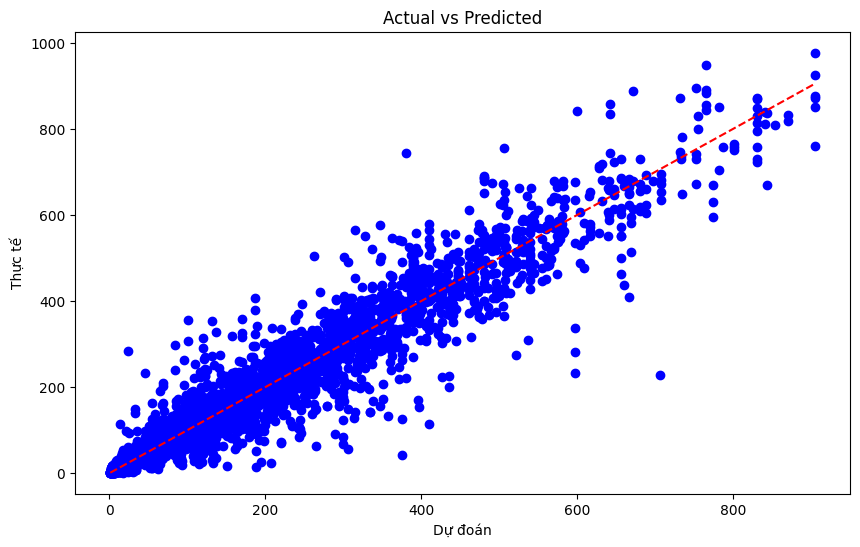

In [27]:
# Vẽ đồ thị dự đoán với trục X là dự đoán và trục Y là thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, color='blue')  
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], linestyle='--', color='red')  
plt.xlabel('Dự đoán')  
plt.ylabel('Thực tế')  
plt.title('Actual vs Predicted')
plt.show()


Vẽ cây quyết định

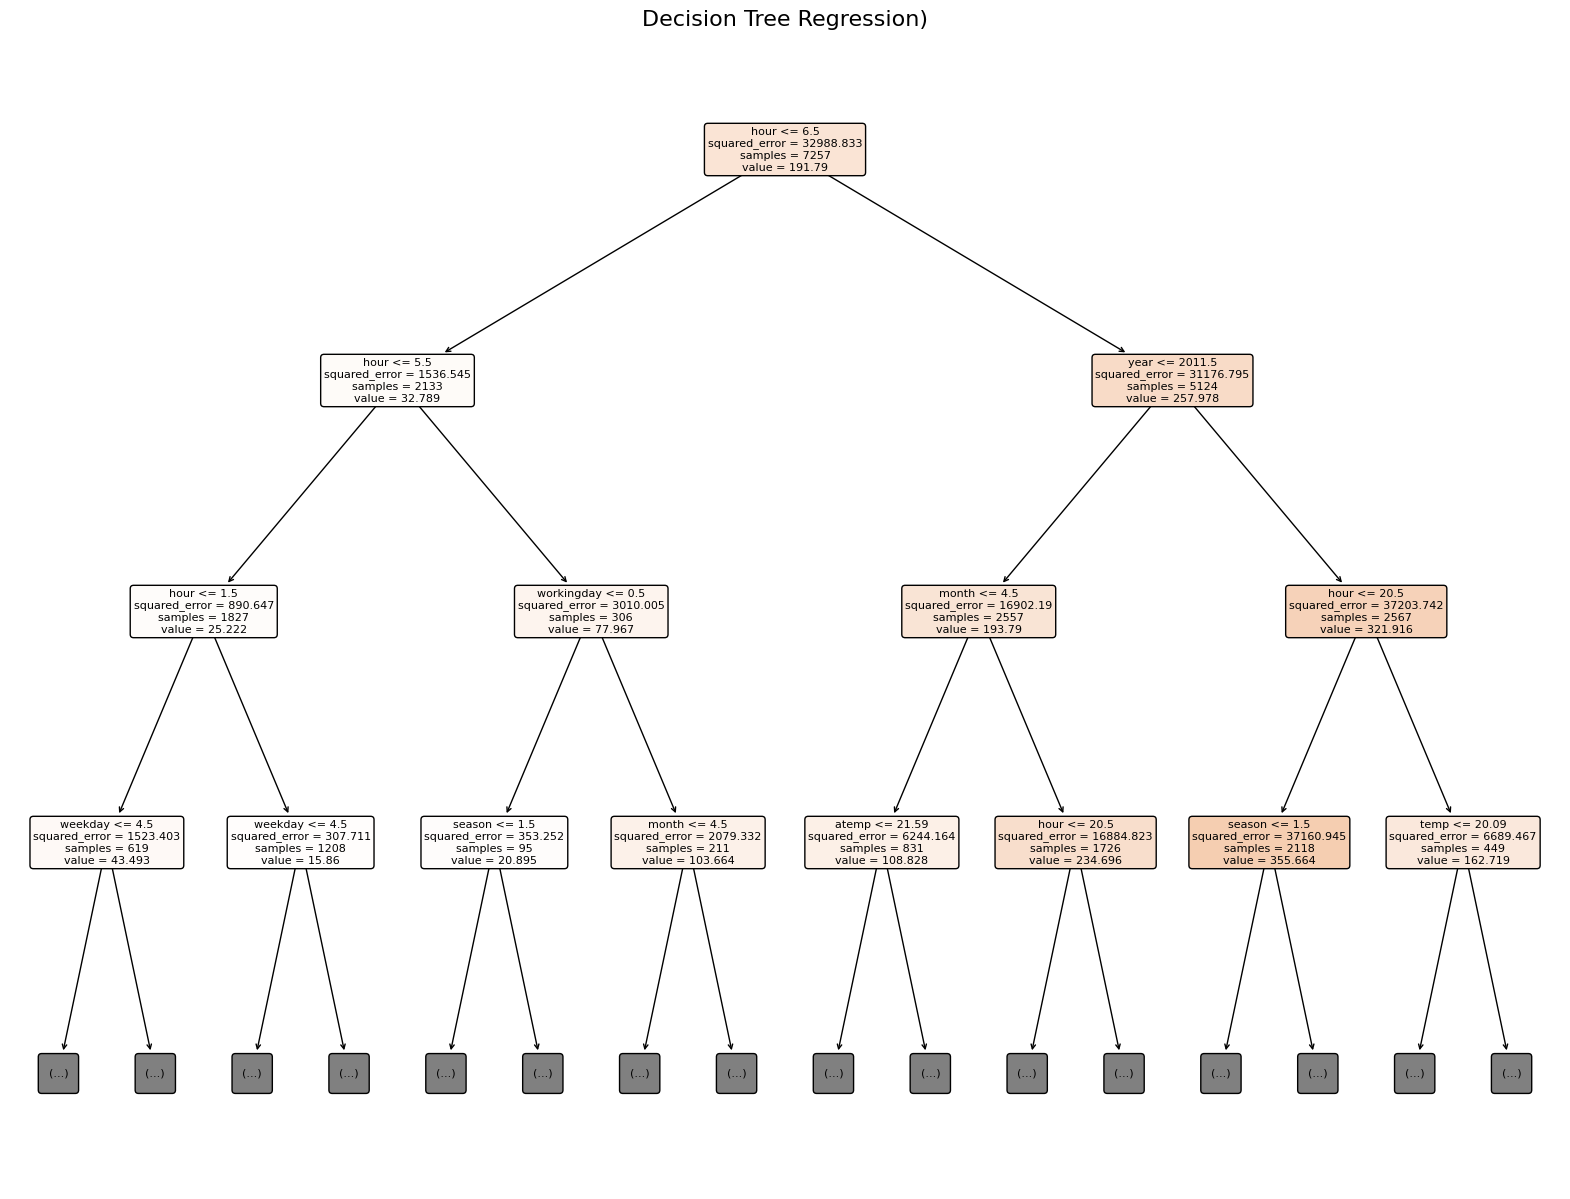

In [28]:
plt.figure(figsize=(20, 15)) 
plot_tree(model, max_depth=3, feature_names=X.columns, filled=True, rounded=True, fontsize=8) 
plt.title("Decision Tree Regression)", fontsize=16)  
plt.show()


Chia Dữ tập dữ liệu theo Kfold

Load Data

In [29]:
# Load dữ liệu từ file CSV
dt = pd.read_csv("BikeSharingDemand.csv")
print ( "Hiển thị 5 dòng đầu của tập data\n ", dt.head())
print ( "Xem kiểu dữ liệu của từng thuộc tính ", dt.dtypes)
print ( "Xem thông tin của dữ liệu ", dt.info())
print ( "Kiểm tra giá trị thiếu ",dt.isnull().sum())

Hiển thị 5 dòng đầu của tập data
          datetime  season  holiday  workingday  weather  temp   atemp  \
0  1/1/2011 0:00       1        0           0        1  9.84  14.395   
1  1/1/2011 1:00       1        0           0        1  9.02  13.635   
2  1/1/2011 2:00       1        0           0        1  9.02  13.635   
3  1/1/2011 3:00       1        0           0        1  9.84  14.395   
4  1/1/2011 4:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
Xem kiểu dữ liệu của từng thuộc tính  datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windsp

Xử lý Data

In [30]:
# tạo cột year, month, day, hour,weekday từ cột datetime
dt["datetime"] = pd.to_datetime(dt["datetime"])
dt["year"] = dt["datetime"].dt.year
dt["month"] = dt["datetime"].dt.month
dt["weekday"] = dt["datetime"].dt.weekday
dt["hour"] = dt["datetime"].dt.hour
print ( "Hiển thị 5 dòng đầu của tập data\n ", dt.head())
print ( "Xem kiểu dữ liệu của từng thuộc tính ", dt.dtypes)
print ( "Xem thông tin của dữ liệu ", dt.info())
print ( "Kiểm tra giá trị thiếu ",dt.isnull().sum())

Hiển thị 5 dòng đầu của tập data
               datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  weekday  hour  
0        81        0.0       3          13     16  2011      1        5     0  
1        80        0.0       8          32     40  2011      1        5     1  
2        80        0.0       5          27     32  2011      1        5     2  
3        75        0.0       3          10     13  2011      1        5     3  
4        75        0.0       0           1      1  2011      1        5     4  
Xem kiểu dữ liệu của t

Chia tập dữ liệu theo kfold 

In [31]:
# Chia dữ liệu thành X và y
X = dt.drop(columns=["casual", "registered", "count", "datetime"])
print(X)
y = dt["count"] 
print(y)
# Số lượng fold
n_splits = 10

# Khởi tạo KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  weekday  hour  
0         0.0000  2011      1        5     0  
1         0.0000  2011      1        5   

Huấn luyện mô hình Theo DecisionTreeRegressor

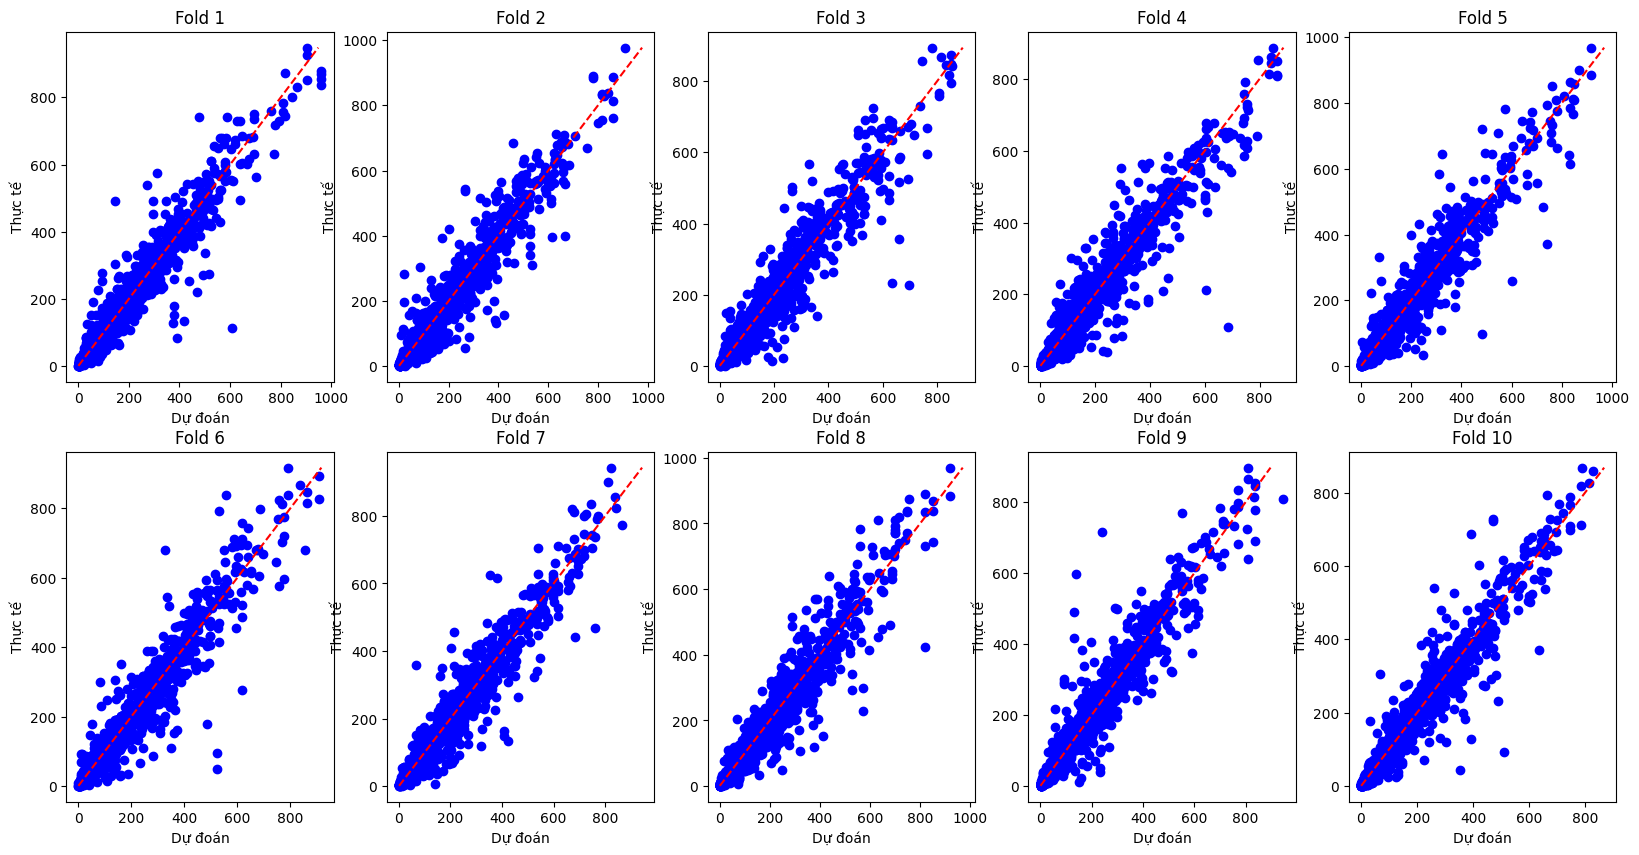

In [32]:

# Tạo figure và axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
# Khởi tạo index fold
fold_index = 0

# Danh sách để lưu trữ MSE và RMSE cho từng mô hình
mse_results = []
rmse_results = []
# Lặp qua các fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Xây dựng và huấn luyện mô hình DecisionTreeRegressor trên fold hiện tại
    model = DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=10,splitter='best')
    model.fit(X_train, y_train)
    
    # Dự đoán kết quả trên fold kiểm tra
    y_pred = model.predict(X_test)
    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mse_results.append(mse)
    rmse_results.append(rmse)
    # Tính toán hàng và cột của subplot
    row = fold_index // 5
    col = fold_index % 5

    # Vẽ scatter plot cho fold hiện tại
    axes[row, col].scatter(y_pred, y_test, color='blue')
    axes[row, col].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    axes[row, col].set_xlabel('Dự đoán')
    axes[row, col].set_ylabel('Thực tế')
    axes[row, col].set_title('Fold {}'.format(fold_index + 1))
    # Tăng index fold
    fold_index += 1
    

Giá giá mô hình

In [33]:
# Hiển thị hình
plt.tight_layout()
plt.show()
# Tính trung bình của MSE và RMSE từ các fold
avg_mse = sum(mse_results) / len(mse_results)
avg_rmse = sum(rmse_results) / len(rmse_results)

# In ra kết quả trung bình của MSE và RMSE
print("DecisionTreeRegressor Average MSE =", avg_mse)
print("DecisionTreeRegressor Average RMSE =", avg_rmse)

<Figure size 640x480 with 0 Axes>

DecisionTreeRegressor Average MSE = 2680.095594596635
DecisionTreeRegressor Average RMSE = 51.741254847337736


Vẽ cây quyết định

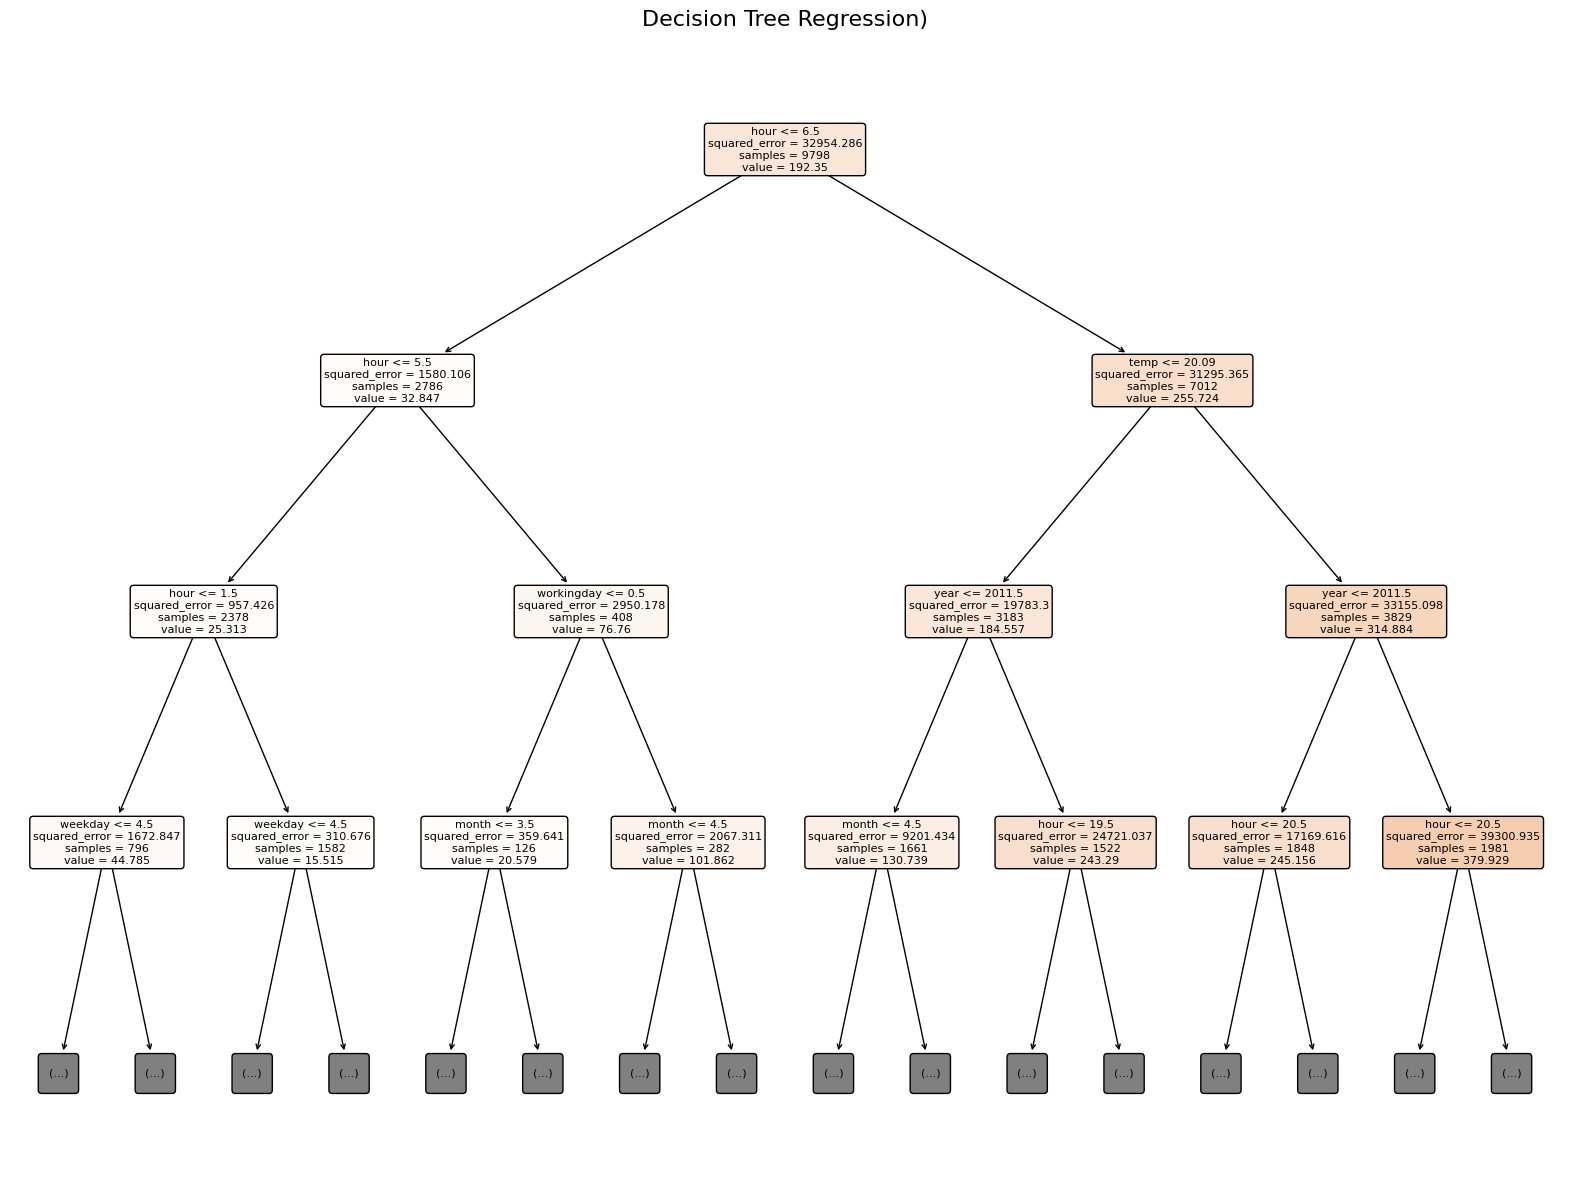

In [34]:
plt.figure(figsize=(20, 15)) 
plot_tree(model, max_depth=3, feature_names=X.columns, filled=True, rounded=True, fontsize=8) 
plt.title("Decision Tree Regression)", fontsize=16)  
plt.show()